In [1]:
import pandas as pd
from deadlift_data_import import import_data
from top50 import top50
import matplotlib.pyplot as plt

# Import the top 50 Raw lifters of all time by weight class and sex
df = top50()

# Create chart of average bodyweight, average bench and heaviest bench by weight class and sex
# Then calculate the relative strength and absolute & relative strength percent growth figures
sex_strength_comparisons = (
    df.groupby(["weightclass_lbs", "sex"])
        .agg(
            avg_bodyweight_lbs=("bodyweight_lbs", "mean"), 
            avg_deadlift_lbs=("deadlift_lbs", "mean"), 
            heaviest_deadlift=("deadlift_lbs", "max")
        )
        .assign(
            strength_ratio=lambda x: (x["avg_deadlift_lbs"] / x["avg_bodyweight_lbs"]), 
            absolute_strength_growth=lambda x: x.groupby("sex")["heaviest_deadlift"].pct_change().mul(100), 
            relative_strength_growth=lambda x: x.groupby("sex")["strength_ratio"].pct_change().mul(100)
        )
        .round(2)
)

sex_strength_comparisons

avg_bodyweight_lbs  avg_deadlift_lbs  \
weightclass_lbs    sex                                         
148                F                147.76            512.15   
                   M                146.18            664.96   
165                F                164.36            524.63   
                   M                169.27            725.36   
181                F                176.80            530.61   
                   M                181.09            772.74   
198                F                193.59            538.02   
                   M                211.55            817.96   
220                F                214.43            514.23   
                   M                218.63            844.96   
242                M                235.81            874.88   
275                M                264.88            867.55   
308                M                296.23            875.96   
Super Heavy Weight F                273.24            570.58   
                   M                348.58            876.48   

                        heaviest_deadlift  strength_ratio  \
weightclass_lbs    sex                                      
148                F               562.18            3.47   
                   M               759.49            4.55   
165                F               617.29            3.19   
                   M               804.69            4.29   
181                F               622.81            3.00   
                   M               892.87            4.27   
198                F               645.95            2.78   
                   M               903.89            3.87   
220                F               586.43            2.40   
                   M               955.70            3.86   
242                M              1030.66            3.71   
275                M              1074.75            3.28   
308                M              1025.15            2.96   
Super Heavy Weight F               636.03            2.09   
                   M               970.03            2.51   

                        absolute_strength_growth  relative_strength_growth  
weightclass_lbs    sex                                                      
148                F                         NaN                       NaN  
                   M                         NaN                       NaN  
165                F                        9.80                     -7.91  
                   M                        5.95                     -5.80  
181                F                        0.89                     -5.97  
                   M                       10.96                     -0.42  
198                F                        3.72                     -7.40  
                   M                        1.23                     -9.39  
220                F                       -9.21                    -13.71  
                   M                        5.73                     -0.04  
242                M                        7.84                     -4.00  
275                M                        4.28                    -11.72  
308                M                       -4.62                     -9.72  
Super Heavy Weight F                        8.46                    -12.92  
                   M                       -5.38                    -14.97

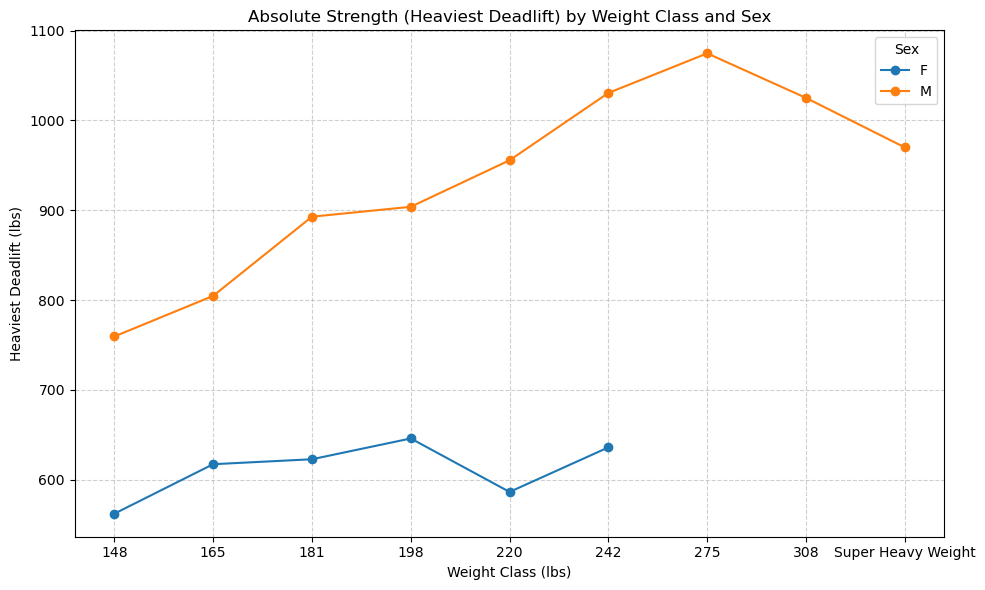

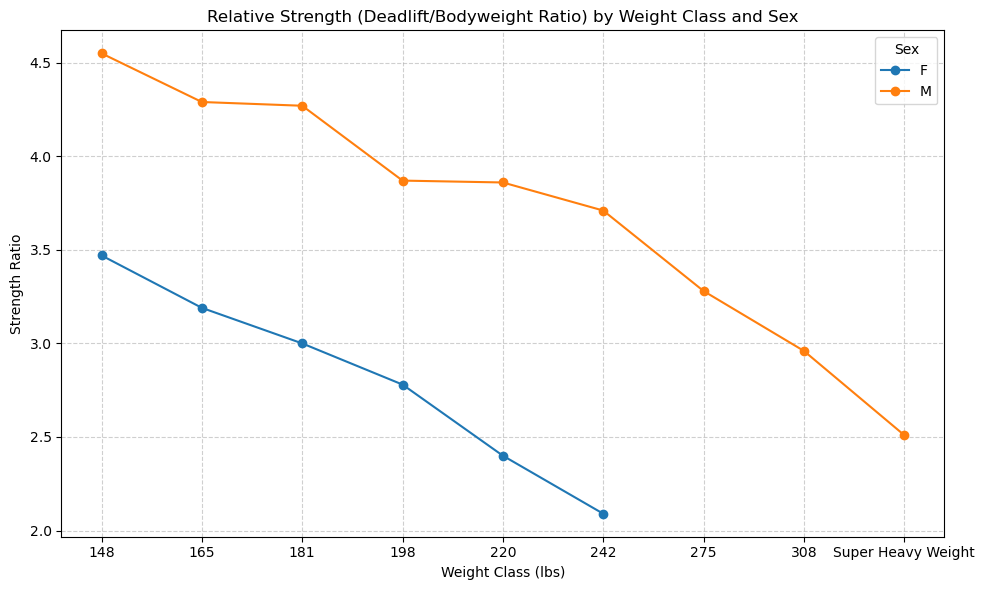

In [3]:
import matplotlib.pyplot as plt

# Reset index for plotting
plot_df = sex_strength_comparisons.reset_index()

# Helper function to numerically sort weight classes
def weightclass_sort_key(wc: str):
    wc = str(wc).strip()
    if wc.lower().startswith("super"):
        return 9999
    try:
        return float(wc.replace("+", "").split()[0])
    except ValueError:
        return 9999

# Sort by numeric weight class order
plot_df = plot_df.sort_values("weightclass_lbs", key=lambda x: x.map(weightclass_sort_key))
ordered_labels = sorted(plot_df["weightclass_lbs"].unique(), key=weightclass_sort_key)

# Reusable plotting function 
def plot_strength_metric(y_col, title, ylabel):
    plt.figure(figsize=(10,6))
    for sex, data in plot_df.groupby("sex"):
        plt.plot(range(len(data)), data[y_col], marker='o', label=sex)
    plt.xticks(ticks=range(len(ordered_labels)), labels=ordered_labels)
    plt.title(title)
    plt.xlabel("Weight Class (lbs)")
    plt.ylabel(ylabel)
    plt.legend(title="Sex")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Absolute Strength (Heaviest Bench)
plot_strength_metric(
    y_col="heaviest_deadlift",
    title="Absolute Strength (Heaviest Deadlift) by Weight Class and Sex",
    ylabel="Heaviest Deadlift (lbs)"
)

# Relative Strength (Bench-to-Bodyweight Ratio)
plot_strength_metric(
    y_col="strength_ratio",
    title="Relative Strength (Deadlift/Bodyweight Ratio) by Weight Class and Sex",
    ylabel="Strength Ratio"
)
